In [1]:
import pandas as pd

In [2]:
col_names = ['ticker', 'date', 'high', 'low', 'open', 'close', 'volume', 'oi', 'extra']

In [3]:
stocks = pd.read_csv('history.csv', names=col_names, parse_dates=['date'])

In [4]:
stocks.head()

,ticker,date,high,low,open,close,volume,oi,extra
0,AAPL,2013-10-29,77.0357,73.5057,76.6100,73.8111,22707445.0,0.0,NaN
1,AAPL,2013-10-28,75.8571,74.7443,75.5771,75.6966,19658589.0,0.0,NaN
2,AAPL,2013-10-25,76.1757,75.0157,75.9021,75.1369,12064019.0,0.0,NaN
3,AAPL,2013-10-24,76.0671,74.6357,75.0000,75.9871,13741585.0,0.0,NaN
4,AAPL,2013-10-23,75.0957,74.1429,74.1429,74.9943,11204446.0,0.0,NaN


In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51094 entries, 0 to 51093
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  51094 non-null  object 
 1   date    51094 non-null  object 
 2   high    51094 non-null  object 
 3   low     51092 non-null  float64
 4   open    51092 non-null  float64
 5   close   51092 non-null  float64
 6   volume  51092 non-null  float64
 7   oi      51092 non-null  float64
 8   extra   0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


## Check for null values

In [6]:
stocks.isna().sum()

ticker        0
date          0
high          0
low           2
open          2
close         2
volume        2
oi            2
extra     51094
dtype: int64

In [7]:
comps = pd.read_csv('stocks.csv', names=['CompanyName', 'ticker'])

In [8]:
merged = pd.merge(stocks, comps, on='ticker')

In [9]:
merged.head()

,ticker,date,high,low,open,close,volume,oi,extra,CompanyName
0,AAPL,2013-10-29,77.0357,73.5057,76.6100,73.8111,22707445.0,0.0,NaN,Apple
1,AAPL,2013-10-28,75.8571,74.7443,75.5771,75.6966,19658589.0,0.0,NaN,Apple
2,AAPL,2013-10-25,76.1757,75.0157,75.9021,75.1369,12064019.0,0.0,NaN,Apple
3,AAPL,2013-10-24,76.0671,74.6357,75.0000,75.9871,13741585.0,0.0,NaN,Apple
4,AAPL,2013-10-23,75.0957,74.1429,74.1429,74.9943,11204446.0,0.0,NaN,Apple


In [10]:
df = merged[['ticker', 'CompanyName', 'date', 'open', 'close']].copy()

In [11]:
# Create a 'movement' field, which shows how much the stock moved in a day
# That is the difference between close and open
df['movement'] = df['close'] - df['open']

In [12]:
df.isna().sum()

ticker         0
CompanyName    0
date           0
open           2
close          2
movement       2
dtype: int64

In [13]:
# Drop null, since only 2
df.dropna(inplace=True)

In [14]:
df = df[['ticker', 'CompanyName', 'date', 'movement']]

In [15]:
result = df.pivot_table(index=['ticker', 'CompanyName'], values='movement', columns='date')

In [16]:
result.head()

,date,2009-12-31,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
ticker,CompanyName,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple,-0.3425,0.0829,-0.0314,-0.4871,-0.1671,0.24,-0.3843,-0.21,0.3972,-0.0971,...,0.0463,0.6457,0.4143,1.3703,-0.9339,0.8514,0.9871,-0.7652,0.1195,-2.7989
AIG,AIG,-0.6700,-0.6400,-0.6500,-0.2100,-0.4200,0.71,-0.2000,-1.13,0.0700,-0.1200,...,0.9200,0.7100,0.1200,-0.4800,0.0100,-0.2800,-0.1900,-0.0400,-0.4000,0.6600
AMZN,Amazon,-2.5700,-2.3500,1.2600,-2.3500,-2.0100,2.96,-2.3120,-1.64,1.2079,-1.7900,...,2.1100,3.7000,9.5710,-3.4500,4.8200,-4.0840,2.5800,4.7900,-1.7600,3.7400
AXP,American express,-0.3800,0.1100,0.0000,0.2600,0.7200,0.19,-0.2700,0.75,0.3000,0.6400,...,0.6800,2.2900,0.4100,-0.0700,0.1000,0.0700,0.1300,1.8500,0.0400,0.5400
BA,Boeing,-0.8700,0.4600,1.7700,1.5500,2.6900,0.06,-1.0800,0.36,0.5500,0.5300,...,1.5600,2.4800,0.0200,-1.2200,0.4800,3.0200,-0.0300,1.9400,1.1300,0.3100


## Use K-Means cluster with 10 clusters for result

In [21]:
indices = result.index.tolist()

In [18]:
companies = [y[1] for y in indices]

In [19]:
companies

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Mitsubishi',
 'Microsoft',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox']

In [20]:
movements = result.iloc[:, :].values

#### Build a pipeline, with normalizer as it normalizes the entire row

In [22]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [23]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'ticker': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels', 'ticker']))

    labels                              ticker
29       0                           McDonalds
1        1                                 AIG
3        1                    American express
5        1                     Bank of America
14       1                   General Electrics
16       1                       Goldman Sachs
24       1                      JPMorgan Chase
49       1                         Wells Fargo
23       2                   Johnson & Johnson
37       2                              Pfizer
50       2                            Wal-Mart
48       2                            Walgreen
2        3                              Amazon
0        3                               Apple
15       3                     Google/Alphabet
32       3                           Microsoft
40       3                                 SAP
44       3  Taiwan Semiconductor Manufacturing
7        4                               Canon
19       4                               Honda
31       4   

### With K-means Cluster of 10, the labels matches the sector that the company is in.

For example: Lable  matches these companies:

* 3                              Amazon
* 3                               Apple
* 3                     Google/Alphabet
* 3                           Microsoft
* 3                                 SAP
* 3  Taiwan Semiconductor Manufacturing


# In this section, use SciPy to do hierchical clustering
## With visuals


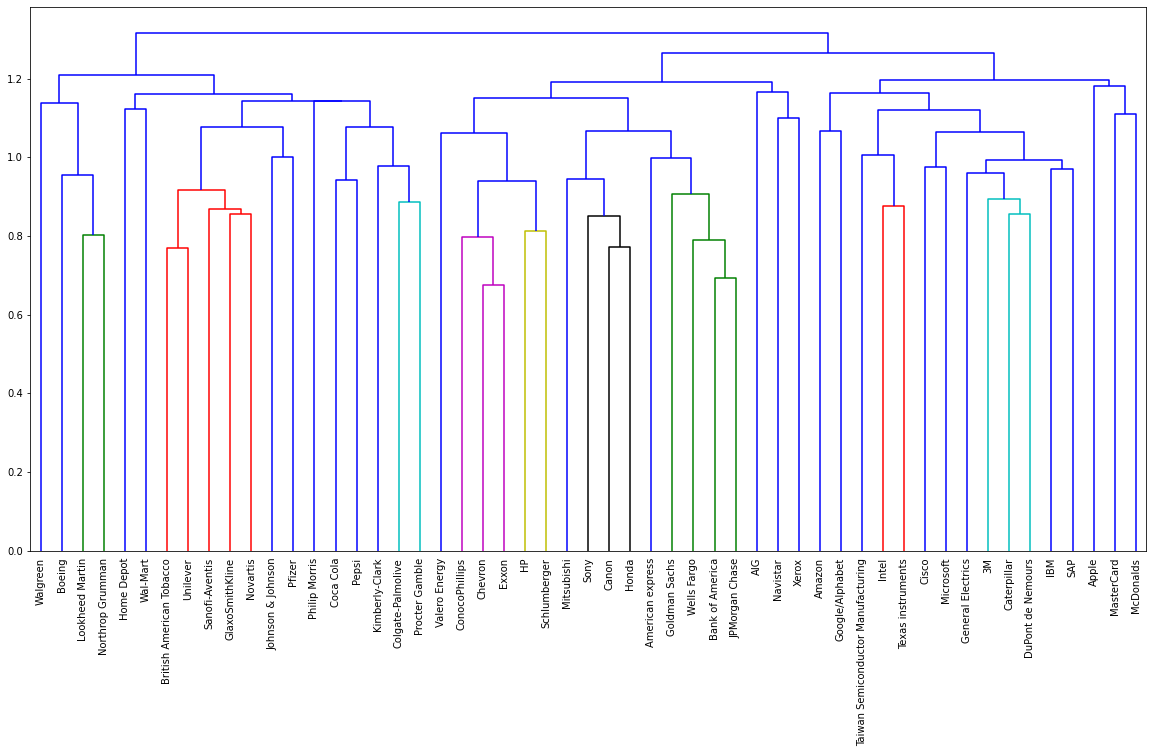

In [24]:
# Import normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(mergings, 
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

## Use t-SNE for visuals
### A scatter plot of the resulting t-SNE features, labeled by the company names, gives us a map of the stock market

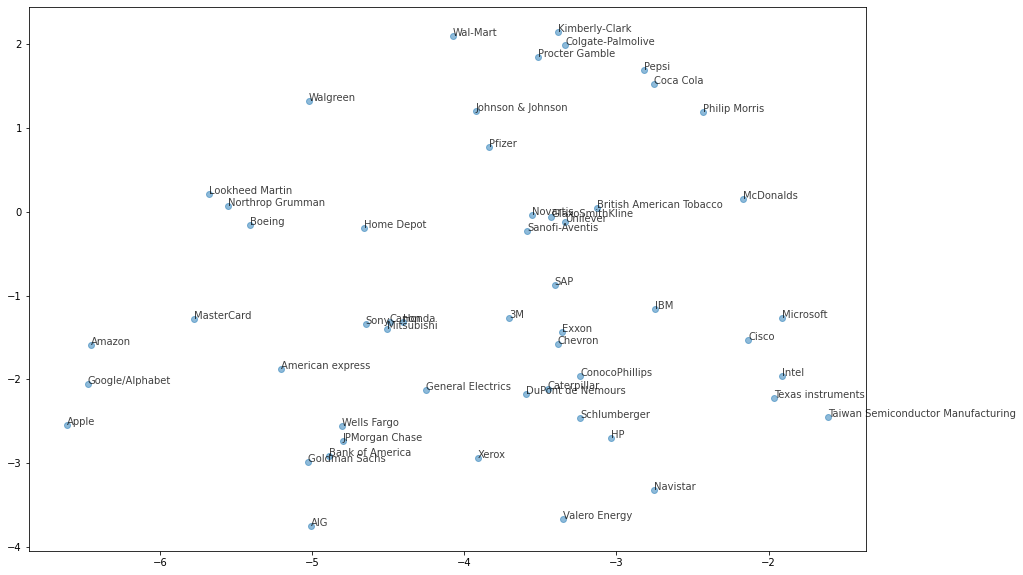

In [25]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(xs, ys, alpha=0.5)


# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)


plt.show()



